<a href="https://colab.research.google.com/github/pathilink/programaria_analise_dados/blob/main/notebooks/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_excel('/content/drive/MyDrive/PrograMaria/analise_dados/data/analise_dados_mod7.xlsx')
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [4]:
dados.columns


Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [5]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [6]:
# filtrando apenas CLTs
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [7]:
# check
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [8]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [9]:
# retirando 'COR/RACA/ETNIA' pouco representativa
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [10]:
# criar coluna
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

In [11]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [12]:
# extraindo digito do tempo de experiência
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [13]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [14]:
# retira '.' para facilitar regex
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3000,1313
de 101 a 500,503
de 1001 a 3000,368
de 501 a 1000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [15]:
# extraindo digito do tempo de experiência
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


In [16]:
# check nulos
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [17]:
# NaN
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [18]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


In [19]:
# cria coluna
dados['INSATISFACAO'] = 0

In [20]:
# localizando apenas 'Salário' x outros motivos
dados.loc[
    dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),
    'Qual o principal motivo da sua insatisfação com a empresa atual?'] \
    .apply(lambda x: 1 if 'Salário' in x else 0)

,Qual o principal motivo da sua insatisfação com a empresa atual?
1,0
2,0
7,1
10,0
26,1
...,...
4227,0
4234,1
4238,0
4240,1


In [21]:
# atribuindo à nova coluna
dados.loc[
    dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),
    'INSATISFACAO'] = \
    dados.loc[
    dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),
    'Qual o principal motivo da sua insatisfação com a empresa atual?'] \
    .apply(lambda x: 1 if 'Salário' in x else 0)

In [22]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


In [23]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [24]:
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x:
                                                          0 if x == 'Não tenho graduação formal' else
                                                          1 if x == 'Estudante de Graduação' else
                                                          2 if x == 'Graduação/Bacharelado' else
                                                          3 if x == 'Pós-graduação' else
                                                          4 if x == 'Mestrado' else
                                                          5 if x == 'Doutorado ou Phd' else
                                                          -1
                                                          )

In [25]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
2,1024
3,975
4,306
1,271
5,100
0,52
-1,4


In [26]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [27]:
# selecionando colunas para modelo
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA',
              'INSATISFACAO', 'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
              'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'
              ]]

In [28]:
dados = pd.get_dummies(dados, columns=['GENERO', 'SETOR', 'REGIAO ONDE MORA', 'NOVO_NIVEL'], drop_first=True)
dados.head()

,IDADE,NAO_BRANCA,TEMPO_EXPERIENCIA,INSATISFACAO,NIVEL DE ENSINO,NUMERO DE FUNCIONARIOS,SALARIO,GENERO_Masculino,GENERO_Prefiro não informar,SETOR_Educação,...,SETOR_Varejo,SETOR_Área da Saúde,SETOR_Área de Consultoria,REGIAO ONDE MORA_Nordeste,REGIAO ONDE MORA_Norte,REGIAO ONDE MORA_Sudeste,REGIAO ONDE MORA_Sul,NOVO_NIVEL_Pessoa Gestora,NOVO_NIVEL_Pleno,NOVO_NIVEL_Sênior
1,32.0,1,3,0,2,3000,4695.0,True,False,False,...,False,False,False,False,True,False,False,True,False,False
2,53.0,0,3,0,3,3000,14202.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,27.0,0,4,0,5,3000,15463.0,True,False,False,...,False,False,False,False,False,True,False,False,False,True
6,21.0,1,1,0,1,3000,4491.0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
7,31.0,0,1,1,2,6,2704.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [29]:
X = dados.drop('SALARIO', axis=1) # atributos
y = dados['SALARIO']              # target

In [30]:
# split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
# treinando o modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
# predição
y_pred = model.predict(X_test_scaled)

In [34]:
# métricas de avaliação
## MSE(Mean Square Error - Erro Quadrático Médio): calcula a média da diferença entre o valor predito e o valor real e eleva ao quadrado
## MAE(Mean Absolut Error): calcula a média da diferença absoluta
## R²: porcentagem da variação da variável resposta explicada pelo modelo - quão próximo os dados estão da linha de regressão

In [35]:
mse = mean_squared_error(y_test, y_pred)
mse

23048733.9782972

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mae

3298.964464206939

In [37]:
r2 = r2_score(y_test, y_pred)
r2

0.5297347873934933

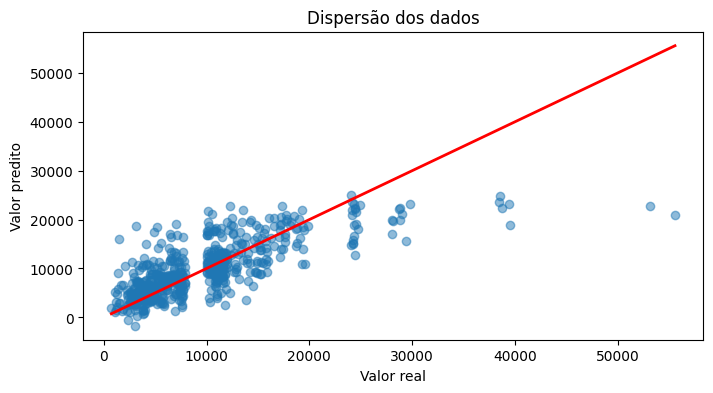

In [38]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.title('Dispersão dos dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) # pontos de início e final da reta
plt.show()

In [39]:
nomes_atributos = X_train.columns
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul', 'NOVO_NIVEL_Pessoa Gestora', 'NOVO_NIVEL_Pleno',
       'NOVO_NIVEL_Sênior'],
      dtype='object')

In [40]:
# coeficientes do modelo
coefs = pd.DataFrame(model.coef_, columns=['coeficientes'], index=nomes_atributos) \
        .sort_values(by='coeficientes', ascending=False)
coefs

,coeficientes
NOVO_NIVEL_Pessoa Gestora,3965.837560
NOVO_NIVEL_Sênior,2008.062980
TEMPO_EXPERIENCIA,2004.015472
NOVO_NIVEL_Pleno,900.352033
NIVEL DE ENSINO,843.824926
NUMERO DE FUNCIONARIOS,797.206111
SETOR_Finanças ou Bancos,727.227138
SETOR_Internet/Ecommerce,693.103642
SETOR_Tecnologia/Fábrica de Software,637.817363
GENERO_Masculino,555.450771


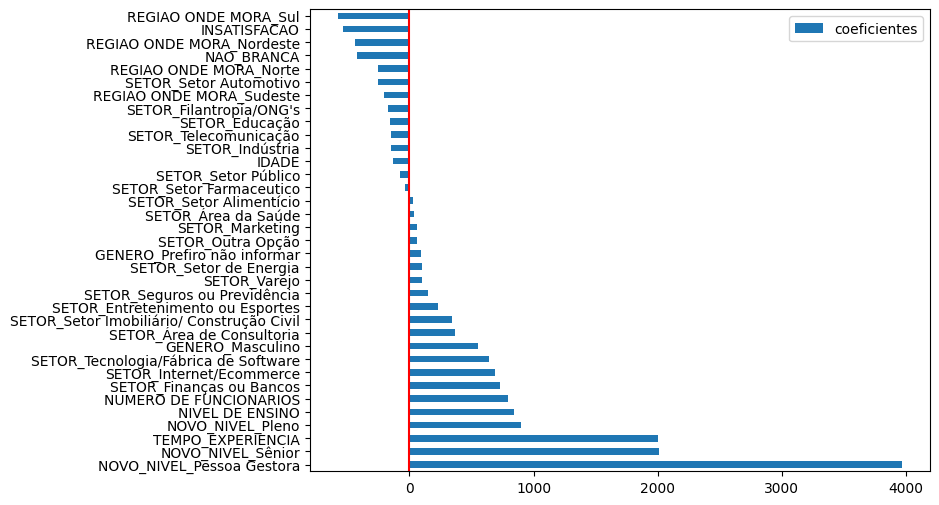

In [41]:
coefs.plot.barh(figsize=(8, 6))
plt.axvline(x=0, color='red') # variáveis > 0 possuem peso positivo aumentando o valor dos salários; variáveis < 0 têm peso negativo